In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_excel("customer_churn_large_dataset.xlsx")

In [10]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [11]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [12]:
print(df)

       CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                              17         73.36             236      0  
1                               1         48.76             172      0  
2           

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [14]:
df.isnull().sum()# checking missing values

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: ylabel='Churn'>

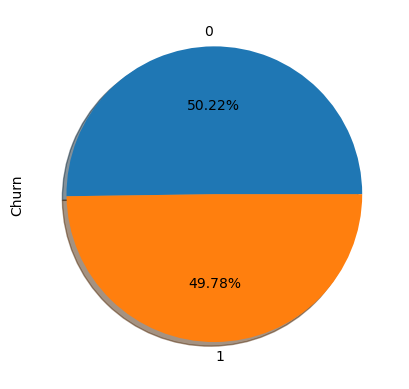

In [16]:
df['Churn'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)#based on the dataset, below graphs shows that how much percentage of churn.

In [17]:
#from above graph, we can see there is no imbalanced data

In [18]:
#From all the above steps we verified missing values, imbalanced data, outliers

In [19]:
#but there is some categorical values, we convert them.

In [20]:
cat=['Name','Gender','Location']
categ_df=df[cat]# seperating categorical based features, to handle them.

In [21]:
categ_df.head()

,Name,Gender,Location
0,Customer_1,Male,Los Angeles
1,Customer_2,Female,New York
2,Customer_3,Female,Los Angeles
3,Customer_4,Female,Miami
4,Customer_5,Female,Miami


In [22]:
Gender_map=pd.get_dummies(df['Gender'],drop_first=True).head()

In [23]:
Gender_map

,Male
0,1
1,0
2,0
3,0
4,0


In [24]:
Gender_dict={'Male':1, 'Female':0}

In [25]:
Gender_dict

{'Male': 1, 'Female': 0}

In [26]:
df['Gender']=df['Gender'].map(Gender_dict)

In [27]:
loca_map=df['Location'].value_counts().to_dict()

In [28]:
df['Location']=df['Location'].map(loca_map)

In [29]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,1,20041,17,73.36,236,0
1,2,Customer_2,62,0,19813,1,48.76,172,0
2,3,Customer_3,24,0,20041,5,85.47,460,0
3,4,Customer_4,36,0,20031,3,97.94,297,1
4,5,Customer_5,46,0,20031,19,58.14,266,0


In [30]:
# i dont think Name impacts in churn, so i'm not fousing on converting categorical data, as i want to remove that feature in the process.

In [31]:
df=df.drop(columns=['Name'],axis=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Age                         100000 non-null  int64  
 2   Gender                      100000 non-null  int64  
 3   Location                    100000 non-null  int64  
 4   Subscription_Length_Months  100000 non-null  int64  
 5   Monthly_Bill                100000 non-null  float64
 6   Total_Usage_GB              100000 non-null  int64  
 7   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 6.1 MB


In [33]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [34]:
x

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,63,1,20041,17,73.36,236
1,2,62,0,19813,1,48.76,172
2,3,24,0,20041,5,85.47,460
3,4,36,0,20031,3,97.94,297
4,5,46,0,20031,19,58.14,266
...,...,...,...,...,...,...,...
99995,99996,33,1,20157,23,55.13,226
99996,99997,62,0,19813,19,61.65,351
99997,99998,64,1,19958,17,96.11,251
99998,99999,51,0,19813,20,49.25,434


In [35]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [36]:
#feature selection

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [38]:
x_train

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
65538,65539,62,0,20157,11,91.17,456
20412,20413,49,1,20157,1,60.52,239
81336,81337,42,1,19958,9,43.42,111
24500,24501,49,0,20157,5,69.95,484
61376,61377,36,1,20157,14,32.21,427
...,...,...,...,...,...,...,...
56760,56761,22,0,19813,4,59.55,467
93176,93177,49,0,20041,22,45.40,269
80037,80038,63,1,19813,11,35.82,441
30727,30728,38,0,20041,4,83.87,280


In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [40]:
best_features=SelectKBest(score_func=chi2,k=5)

In [41]:
best_features.fit(x_train,y_train)

SelectKBest(k=5, score_func=<function chi2 at 0x000001FEEBEC9300>)

In [42]:
x_train.columns[best_features.get_support()]

Index(['CustomerID', 'Age', 'Location', 'Subscription_Length_Months',
       'Total_Usage_GB'],
      dtype='object')

In [43]:
#even after feature selection, i think customer id  is not important, because by seeing this data frame, we can say that customer id is not so important

In [44]:
x_train=x_train.drop(columns=['CustomerID','Gender','Monthly_Bill'],axis=True)

In [45]:
x_test=x_test.drop(columns=[ 'CustomerID','Gender','Monthly_Bill'],axis=True)

In [46]:
x_train

,Age,Location,Subscription_Length_Months,Total_Usage_GB
65538,62,20157,11,456
20412,49,20157,1,239
81336,42,19958,9,111
24500,49,20157,5,484
61376,36,20157,14,427
...,...,...,...,...
56760,22,19813,4,467
93176,49,20041,22,269
80037,63,19813,11,441
30727,38,20041,4,280


In [47]:
# But generally churn means, loosing the customer based on some services, so feature like age, subscription_length,location and total_usage_GB are most important in this data set.

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy',random_state=10)

In [49]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=10)

In [50]:
pred=rfc.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[7648 7344]
 [7695 7313]]
0.4987


In [52]:
# hyper parameter tuning
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [53]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=30,cv=3,verbose=2,
                               random_state=10,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\Chintu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Chintu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Chintu\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Chintu\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Chintu\anaconda3\Lib\site-pack

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=10, verbose=2)

In [54]:
rf_randomcv.best_params_

{'n_estimators': 52,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'gini'}

In [55]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=10, verbose=2)

In [56]:
best_random_grid=rf_randomcv.best_estimator_

In [57]:
y_pred=best_random_grid.predict(x_test)


In [58]:
accuracy_score(y_test,y_pred)

0.5015666666666667

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(random_state=10)

In [60]:
dtr.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [61]:
dtr.predict(x_test)

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [62]:
accuracy_score(dtr.predict(x_test),y_test)

0.49683333333333335

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [64]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
y_pred=knn.predict(x_test)

In [66]:
accuracy_score(y_pred,y_test)

0.5048333333333334

In [67]:
from sklearn.svm import SVC
svc=SVC()

In [68]:
svc.fit(x_train,y_train)

SVC()

In [69]:
pred=svc.predict(x_test)

In [70]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
accuracy_score(pred,y_test)

0.4997333333333333

In [72]:
import pickle
pickle.dump(knn,open('classifier.pkl','wb'))